In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/auto-insurance-in-sweden/swedish_insurance.csv


In [2]:
#import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv('../input/auto-insurance-in-sweden/swedish_insurance.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63 entries, 0 to 62
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       63 non-null     int64  
 1   Y       63 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 1.1 KB


In [4]:
data.head()

,X,Y
0,108,392.5
1,19,46.2
2,13,15.7
3,124,422.2
4,40,119.4


In [5]:
data.shape

(63, 2)

In [6]:
data.describe()

,X,Y
count,63.000000,63.000000
mean,22.904762,98.187302
std,23.351946,87.327553
min,0.000000,0.000000
25%,7.500000,38.850000
50%,14.000000,73.400000
75%,29.000000,140.000000
max,124.000000,422.200000


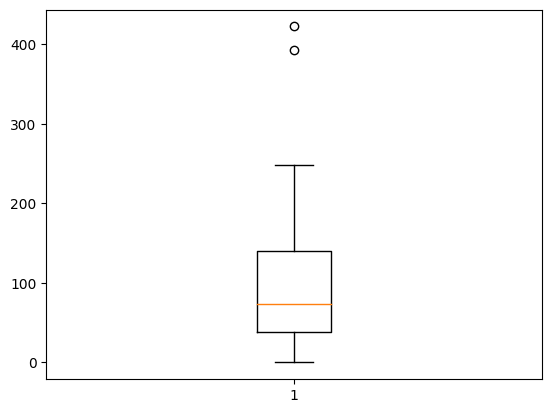

In [7]:
plt.boxplot(data.Y)
plt.show()

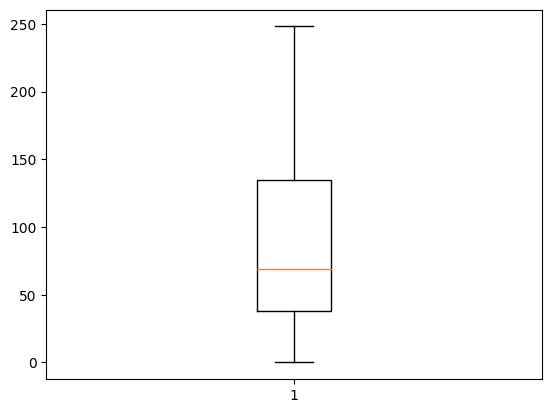

In [8]:
# Try to exclude outliers
Q1 = data.Y.quantile(0.25)
Q3 = data.Y.quantile(0.75)
IQR = Q3 - Q1
data = data[(data.Y >= Q1 - 1.5 * IQR) & (data.Y <= Q3 + 1.5*IQR)]
plt.boxplot(data.Y)
plt.show()

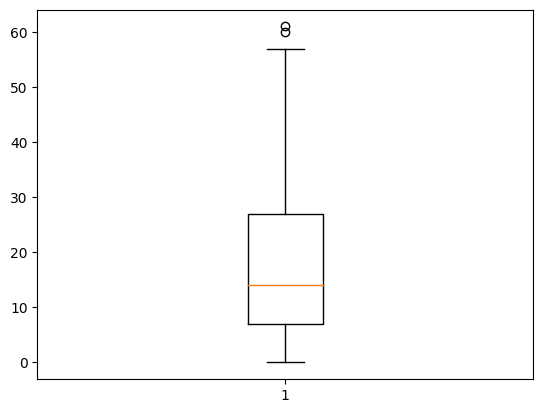

In [9]:
plt.boxplot(data.X)
plt.show()

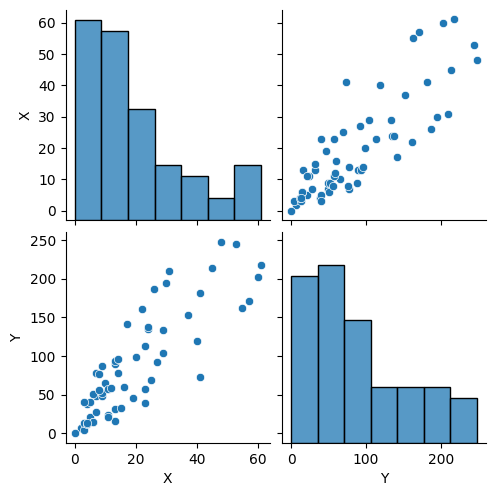

In [10]:
sns.pairplot(data)
plt.show()

Split Data to Training and Testing Sets

In [11]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(data, test_size = 0.3)


Dividing X and Y for model building

In [12]:
y_train = train.pop('Y')
x_train = train

y_train, x_train

(49     39.9
 61    244.6
 6      56.9
 58     87.4
 46     21.3
 28     27.9
 9      65.3
 12     23.5
 27     98.1
 62    187.5
 17     50.9
 34    161.5
 31     69.2
 11    248.1
 39     59.6
 35     57.2
 40     89.9
 4     119.4
 55    133.3
 16    134.9
 54     55.6
 25     77.5
 33     40.3
 59    209.8
 2      15.7
 23     13.2
 5     170.9
 29     38.1
 1      46.2
 32     14.6
 36    217.6
 41    202.4
 14     48.8
 24    103.9
 20     14.8
 47     92.6
 37     58.1
 38     12.6
 7      77.5
 60     95.5
 26     11.8
 56    194.5
 Name: Y, dtype: float64,
      X
 49   3
 61  53
 6   23
 58   9
 46  11
 28   7
 9   10
 12  11
 27  20
 62  26
 17   6
 34  22
 31  25
 11  48
 39  16
 35  11
 40  13
 4   40
 55  29
 16  24
 54   8
 25   7
 33   5
 59  31
 2   13
 23   3
 5   57
 29   4
 1   19
 32   6
 36  61
 41  60
 14   7
 24  29
 20   6
 47  27
 37  12
 38   4
 7   14
 60  14
 26   4
 56  30)

In [13]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [14]:
lm = LinearRegression()
lm.fit(x_train, y_train)

LinearRegression()

In [15]:
import statsmodels.api as sm
x_train = sm.add_constant(x_train)
model = sm.OLS(y_train, x_train).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.742
Model:                            OLS   Adj. R-squared:                  0.736
Method:                 Least Squares   F-statistic:                     115.2
Date:                Fri, 05 Jan 2024   Prob (F-statistic):           2.42e-13
Time:                        01:53:48   Log-Likelihood:                -208.60
No. Observations:                  42   AIC:                             421.2
Df Residuals:                      40   BIC:                             424.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.2791      8.664      2.110      0.0

In [16]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [17]:
vif = pd.DataFrame()
X = x_train
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,2.49
1,X,1.00


Residual Analysis
One of the important assumption is that the error terms are normally distributed

In [18]:
y_train_Y = model.predict(x_train)

In [19]:
res = (y_train_Y - y_train)
res

49   -10.676378
61   -32.968410
6     45.286809
58   -36.287422
46    37.108897
28    15.916260
9    -10.539262
12    34.908897
27    -6.857669
62   -74.368713
17   -10.731900
34   -62.961350
31    40.283128
11   -54.709207
39    17.049694
35     1.208897
40   -24.194784
4     44.805518
55    -9.224235
16   -29.065031
54    -8.135581
25   -33.683740
33    -3.780059
59   -78.427916
2     50.005216
23    16.023622
5     55.324227
29    -5.228218
1     41.394172
32    25.568100
36    23.216864
41    34.768705
14    -4.983740
24    20.175765
20    25.368100
47    24.179447
37     3.957057
38    20.271782
7     -8.146625
60   -26.146625
26    21.071782
56   -66.776075
dtype: float64

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

/tmp/ipykernel_19/1125523441.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_train - y_train_Y), bins = 25)


Text(0.5, 0, 'Errors')

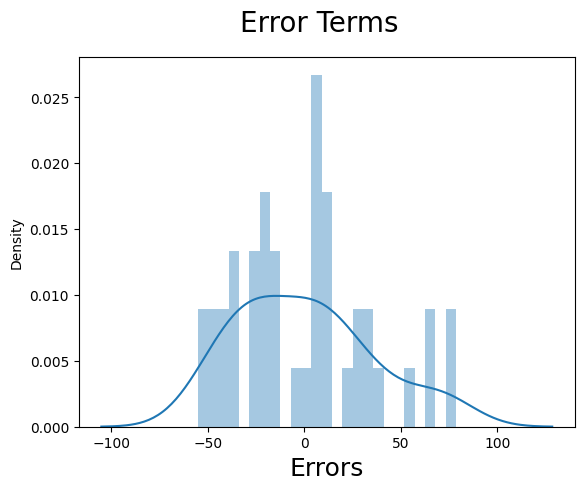

In [21]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_Y), bins = 25)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

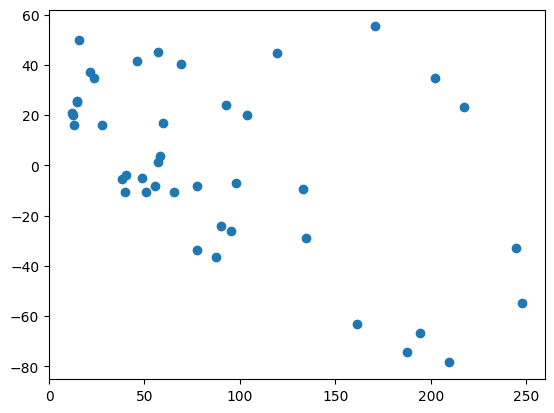

In [22]:
plt.scatter(y_train,res)
plt.show()

In [23]:
test

,X,Y
15,2,6.6
52,13,31.9
22,9,52.1
53,15,32.1
44,55,162.8
51,13,93.0
13,23,39.6
30,0,0.0
43,37,152.8
50,17,142.1


In [24]:
y_test = test.pop('Y')
x_test = test

In [25]:
x_test = sm.add_constant(x_test)

In [26]:
y_pred = model.predict(x_test)

In [27]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.638646735928801

Text(0, 0.5, 'y_pred')

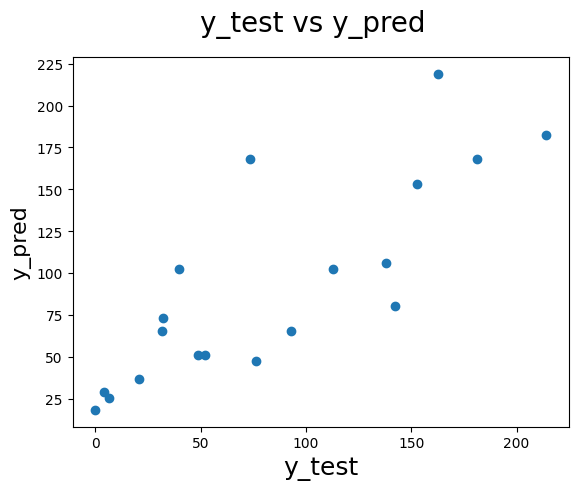

In [28]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label